In [3]:
import tensorflow as tf
import matplotlib.pyplot as plt

In [4]:
gpus=tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu,True)


In [5]:
dataset=tf.keras.preprocessing.image_dataset_from_directory(
    "Data",
    batch_size=32,
    shuffle='True',
    image_size=(256,256)
)

Found 2152 files belonging to 3 classes.


In [6]:
class_name=dataset.class_names
class_name


['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']

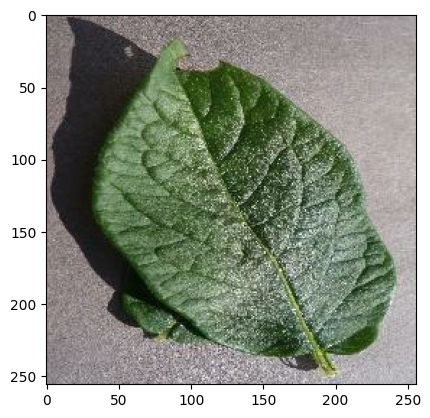

In [7]:
for image_batch, label_batch in dataset.take(1):
    plt.imshow(image_batch[1].numpy().astype("uint8"))
    #print(image_batch[0].numpy())
    
    

In [8]:
len(dataset)

68

In [9]:
len(dataset)*0.1

6.800000000000001

In [10]:
train_size=54
test_size=7
val_size=7

In [11]:
train_ds=dataset.take(54)

In [12]:
test_ds=dataset.skip(54)
len(test_ds)

14

In [13]:
val_ds=test_ds.take(7)
len(val_ds)

7

In [14]:
test_ds=test_ds.skip(6)
len(test_ds)

8

In [15]:
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds = val_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds = test_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)


In [16]:
from keras import layers
resize_and_rescale=tf.keras.Sequential(
    [
        layers.Resizing(256,256),
        layers.Rescaling(1.0/255)
    ]
)

In [17]:
data_augmentation=(
    [
        layers.RandomFlip("horizontal_and_vertical"),
        layers.RandomRotation(0.2)
    ]
)


In [18]:
from keras.models import Sequential
from keras.layers import Flatten, Dense, Conv2D, MaxPooling2D
input_shape=256,256,3

In [19]:
model=Sequential()

resize_and_rescale
data_augmentation

model.add(Conv2D(128, (3,3), activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())
model.add(Conv2D(64,(3,3), activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(32,(3,3), activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(16,(3,3), activation='relu'))
model.add(MaxPooling2D())

model.add(Flatten())

model.add(Dense(256,activation='relu'))
model.add(Dense(161,activation='relu'))
model.add(Dense(16,activation='sigmoid'))



C:\Users\Puneet\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [20]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 254, 254, 128)       │           3,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 127, 127, 128)       │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 125, 125, 64)        │          73,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 62, 62, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 60, 60, 32)          │          18,464 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 30, 30, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 28, 28, 16)          │           4,624 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 14, 14, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 3136)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 256)                 │         803,072 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 161)                 │          41,377 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 16)                  │           2,592 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 947,505 (3.61 MB)

 Trainable params: 947,505 (3.61 MB)

 Non-trainable params: 0 (0.00 B)

In [21]:
model.compile(optimizer='adam', loss='SparseCategoricalCrossentropy', metrics=['accuracy'])


In [ ]:
history=model.fit(
    train_ds,
    epochs=8,
    batch_size=32,
    validation_data=val_ds
)

Epoch 1/8
 5/54 ━━━━━━━━━━━━━━━━━━━━ 4:36 6s/step - accuracy: 0.2369 - loss: 31.0552

In [1]:
import matplotlib.pyplot as plt
plt.plot(range(10),history.history['accuracy'], color='blue', label='accuracy')
plt.plot(range(10),history.history['val_accuracy'], color='red', label='val_accuracy')
plt.legend()

NameError: name 'history' is not defined

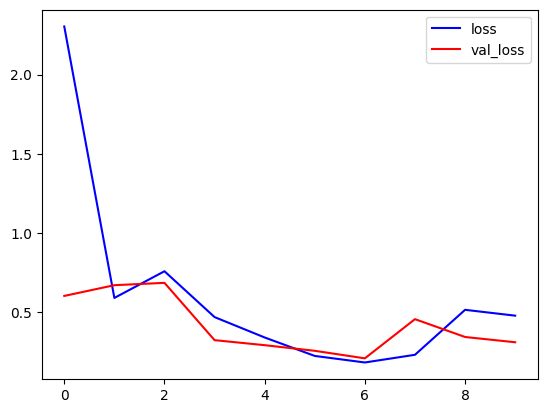

In [82]:
plt.plot(history.history['loss'], color='blue', label='loss')
plt.plot(history.history['val_loss'], color='red', label='val_loss')
plt.legend()


batch is: Potato___Early_blight
1/1 ━━━━━━━━━━━━━━━━━━━━ 7s 7s/step
your prediction is  Potato___Early_blight


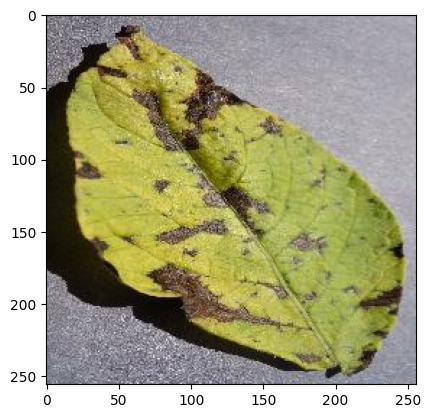

In [117]:
import numpy as np
for image_batch , batch_label in dataset.take(1):
    image=(image_batch[0].numpy().astype('uint8'))
    label=batch_label[0].numpy()

    plt.imshow(image)
    print(f"batch is: {class_name[label]}")

    y_pred=model.predict(image_batch)
    
    print("your prediction is ",class_name[np.argmax(y_pred[0]) ] )

In [146]:
!pip install numpy

In [151]:

def predict(model, image):
    img_array=tf.keras.preprocessing.image.img_to_array(images[i].numpy())
    img_array=tf.expand_dims(img_array,0)

    prediction=model.predict(img_array)
    pred_class=class_name[np.argmax(prediction[0])]
    confidence=round(100*np.max(prediction[0]),2)
    return pred_class, confidence

    

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


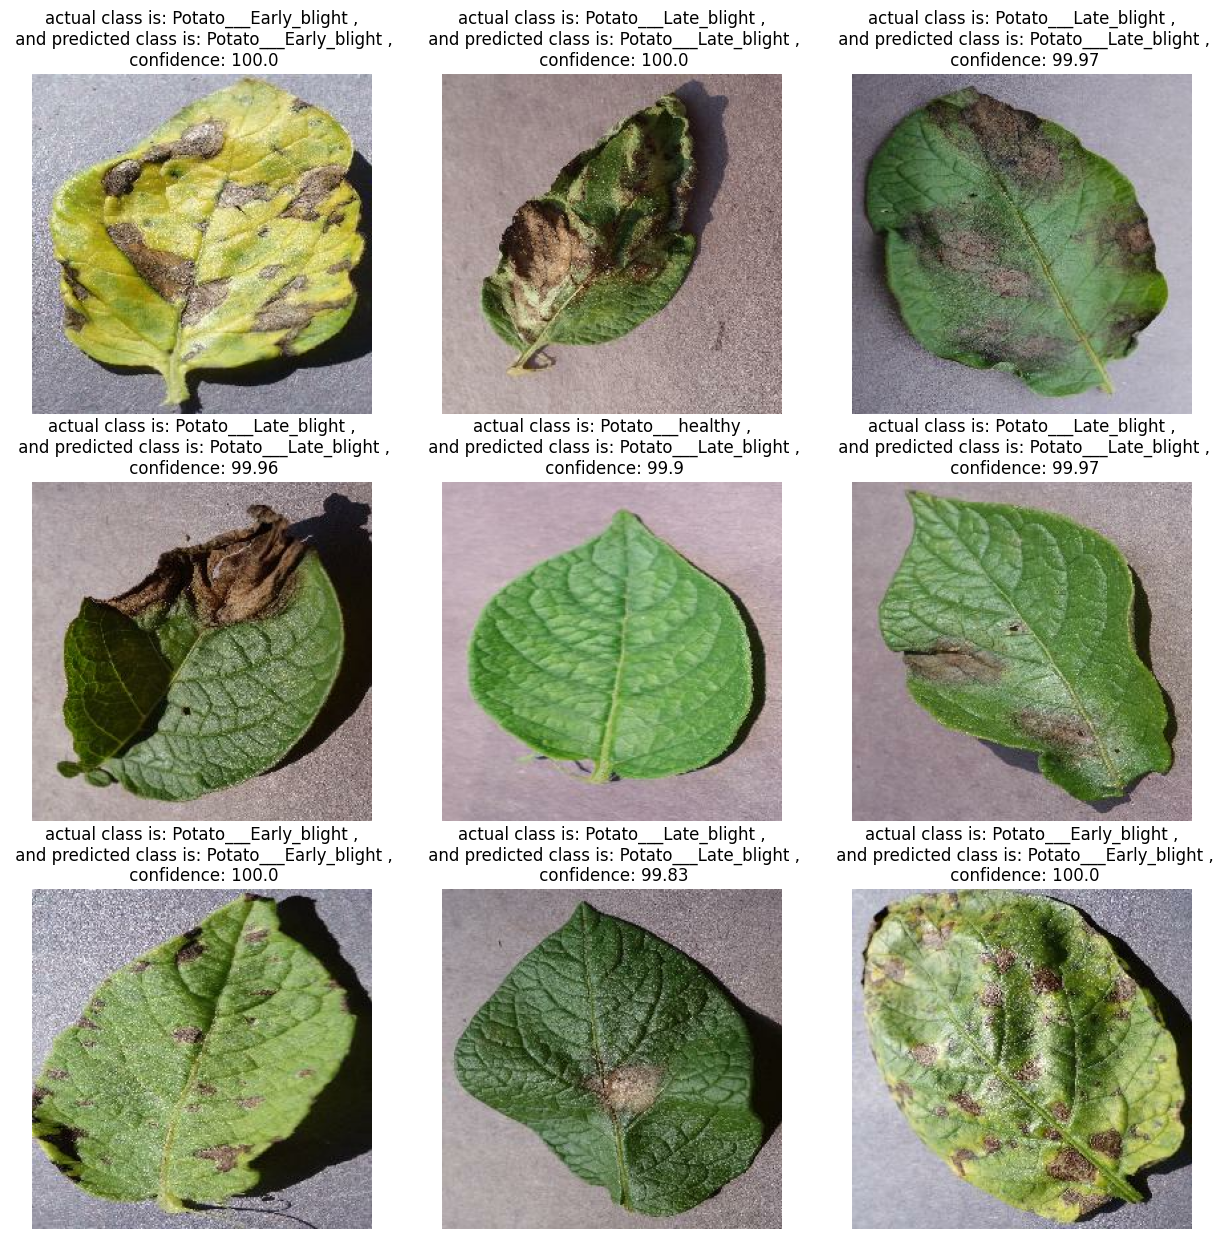

In [158]:
plt.figure(figsize=(15,15))
for images, labels in test_ds.take(1):
    for i in range(9):
        ax= plt.subplot(3,3,i+1)
        plt.imshow(images[i].numpy().astype('uint8'))
        actual_class=class_name[labels[i]]
        pred_class, confidence=predict(model, images[i].numpy())
        plt.title(f"actual class is: {actual_class} ,\n and predicted class is: {pred_class} ,\n confidence: {confidence}")
        plt.axis('off')

        

In [181]:
from tensorflow.keras.models import load_model
model.save(os.path.join('models' , 'potatodiseaseclassification.h5'))


In [183]:
os.path.join('models','potatodiseaseclassification.h5')

'models\\potatodiseaseclassification.h5'

In [184]:
new_model=load_model(os.path.join('models' , 'potatodiseaseclassification.h5'))